In [4]:
#Import requared libraries
import pandas as pd
import matplotlib.pyplot as plt

In [25]:
#Create a dataframe 
data={'name':['Ali','Sara','Reza','Niloofar','Omid'],
      'age':[17,16, None,18,17],
      'grade':[85,None,78,90,88], 
      'subject':['Math','English','Math',None,'Math']
     }
df=pd.DataFrame(data)

#Check structure & missing values
print('\nDf:\n',df)
print('\nDf info:\n')
df.info()
print('\n\nNull in df:')
df.isnull().sum()



Df:
        name   age  grade  subject
0       Ali  17.0   85.0     Math
1      Sara  16.0    NaN  English
2      Reza   NaN   78.0     Math
3  Niloofar  18.0   90.0     None
4      Omid  17.0   88.0     Math

Df info:

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5 entries, 0 to 4
Data columns (total 4 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   name     5 non-null      object 
 1   age      4 non-null      float64
 2   grade    4 non-null      float64
 3   subject  4 non-null      object 
dtypes: float64(2), object(2)
memory usage: 292.0+ bytes


Null in df:


name       0
age        1
grade      1
subject    1
dtype: int64

In [9]:
#Save/read CSV
df.to_csv('students_dirty.csv',index=False)
df=pd.read_csv('students_dirty.csv')

#Copy DataFrame
df_before=df.copy()

#convert all string columns to lowercase for consistency
df=df.apply(lambda x:x.str.strip().str.lower() if x.dtype=='object' else x)

In [19]:
#remove the rows without subject & fill numeric NaNs with mean(rounded)
df_clean = df.dropna(subset=['subject']).copy()

df_clean['age']=df_clean['age'].fillna(round(df_clean['age'].mean()))
df_clean['grade']=df_clean['grade'].fillna(round(df_clean['age'].mean()))

print('\nInfo df_clean:\n')
df_clean.info()
print('\nNull in df_clean:\n',df_clean.isnull().sum())                                           


Info:

<class 'pandas.core.frame.DataFrame'>
Index: 4 entries, 0 to 4
Data columns (total 4 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   name     4 non-null      object 
 1   age      4 non-null      float64
 2   grade    4 non-null      float64
 3   subject  4 non-null      object 
dtypes: float64(2), object(2)
memory usage: 160.0+ bytes

Null:

 name       0
age        0
grade      0
subject    0
dtype: int64


In [17]:
#Compare before and after cleaning
print('Rows before cleaning:',len(df_before))
print('Rows after cleaning:',len(df_clean))
print()

print('Average grade before cleaning:',round(df_before['grade'].mean(),1))
print('Average grade after cleaning:',round(df_clean['grade'].mean(),1))
print()

print('Cleaned DataFrame:')
print(df_clean)
      

Rows before cleaning: 5
Rows after cleaning: 4

Average grade before cleaning: 85.2
Average grade after cleaning: 67.0

Cleaned DataFrame:
   name   age  grade  subject
0   ali  17.0   85.0     math
1  sara  16.0   17.0  english
2  reza  17.0   78.0     math
4  omid  17.0   88.0     math


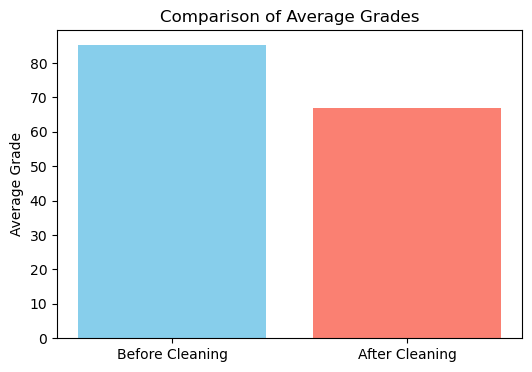

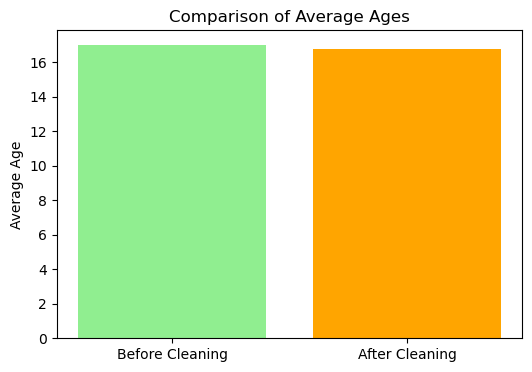

In [18]:
#Comparison of average grade and age before and after cleaning

#Prepare data
avg_grades=[df_before['grade'].mean(),df_clean['grade'].mean()]
avg_ages=[df_before['age'].mean(),df_clean['age'].mean()]
labels=['Before Cleaning','After Cleaning']

#Plot average grades
plt.figure(figsize=(6,4))
plt.bar(labels,avg_grades,color=['skyblue','salmon'])
plt.ylabel('Average Grade')
plt.title('Comparison of Average Grades')
plt.show()

#Plot average ages
plt.figure(figsize=(6,4))
plt.bar(labels,avg_ages,color=['lightgreen','orange'])
plt.ylabel('Average Age')
plt.title('Comparison of Average Ages')
plt.show()